
<a id='coleman-policy-iter'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Crescimento Ótimo II: Iteração no Tempo

## Conteúdo

- [Crescimento Ótimo II: Iteração no Tempo](#Crescimento-Ótimo-II:-Iteração-no-Tempo)  
  - [Resumo](#Resumo)  
  - [A Equação de Euler](#A-Equação-de-Euler)  
  - [Comparação com a Função de Valor Iteração](#Comparação-com-a-Função-de-Valor-Iteração)  
  - [Implementação](#Implementação)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Nessa aula continuaremos nosso [estudo anterior](https://julia.quantecon.org/optgrowth.html) do modelo de crescimento ótimo estocástico.

Nessa aula, resolvemos o problema de programação dinâmica com desconto associado usando a iteração da função de valor.

A beleza dessa técnica é sua ampla aplicabilidade.

No entanto, com problemas numéricos, geralmente podemos obter maior eficiência em aplicações específicas, derivando métodos cuidadosamente adaptados a aplicação em questão.

O modelo de crescimento ótimo estocástico tem uma estrutura considerável para abordar esse fim, principalmente quando adotamos algumas premissas de concavidade e suavidade em relação as primitivas.

Usaremos essa estrutura para obter um método baseado na **equação de Euler** que seja mais eficiente do que a iteração da função de valor para este e algumas outras aplicações intimamente relacionados.

Em uma [aula subsequênte](https://julia.quantecon.org/egm_policy_iter.html) veremos que parte da implementação numérica do método da equação de Euler pode ser ajustada ainda mais para obter ainda mais eficiência.

## A Equação de Euler

Vamos pegar o modelo estabelecido na [aula do modelo de crescimento estocástico](https://julia.quantecon.org/optgrowth.html) e adicionar as suposições que:

1. $ u $ e $ f $ são contínuamente diferênciáveis e estritamente côncavas. 
1. $ f(0) = 0 $  
1. $ \lim_{c \to 0} u'(c) = \infty $ e $ \lim_{c \to \infty} u'(c) = 0 $  
1. $ \lim_{k \to 0} f'(k) = \infty $ e $ \lim_{k \to \infty} f'(k) = 0 $  


As duas últimas condições são usualmente chamadas de **Condições de Inada**.

Lembre-se da equação de Bellman:


<a id='equation-cpi-fpb30'></a>
$$
v^*(y) = \max_{0 \leq c \leq y}
    \left\{
        u(c) + \beta \int v^*(f(y - c) z) \phi(dz)
    \right\}
\quad \text{para todo} \quad
y \in \mathbb R_+ \tag{1}
$$

Deixe que a política de consumo ótimo seja denotada por $ c^* $.

Sabemos que $ c^* $ é uma política ganaciosa $ v^* $, para que $ c^*(y) $ seja o maximizador em [(1)](#equation-cpi-fpb30).

As condições acima implicam que:

- $ c^* $ é a única política ótima para o modelo de crescimento ótimo estocástico.
- a política ótima é contínua, estritamente crescente e também **interior**, no sentido de que $ 0 < c^*(y) < y $ para todo $ y $ estritamente positivo, e 
- a função de valor é estritamente côncava e continuamente diferenciável, com: 



<a id='equation-cpi-env'></a>
$$
(v^*)'(y) = u' (c^*(y) ) := (u' \circ c^*)(y) \tag{2}
$$

O último resultado é chamado de **condição de envelope** devido a sua relação com o [teorema do envelope](https://en.wikipedia.org/wiki/Envelope_theorem).

Para ver o porquê [(2)](#equation-cpi-env) deve ser valido, escreva a equação de Bellman na forma equivalente:

$$
v^*(y) = \max_{0 \leq k \leq y}
    \left\{
        u(y-k) + \beta \int v^*(f(k) z) \phi(dz)
    \right\},
$$

diferêncie ingênuamente com respeito a $ y $, e então avalie o ótimo.

A Seção 12.1 de [EDTC](http://johnstachurski.net/edtc.html) contém provas completas desses resultados, e discussões estreitamente relacionadas podem ser encontradas em muitos outros textos.

A diferenciabilidade da função de valor e a iterioridade da política ótima implicam que o consumo ideal satisfaz a condição de primeira ordem associada a [(1)](#equation-cpi-fpb30), que é:


<a id='equation-cpi-foc'></a>
$$
u'(c^*(y)) = \beta \int (v^*)'(f(y - c^*(y)) z) f'(y - c^*(y)) z \phi(dz) \tag{3}
$$

Combinando [(2)](#equation-cpi-env) e a condição de primeira ordem [(3)](#equation-cpi-foc) temos a famosa **Equação de Euler**.


<a id='equation-cpi-euler'></a>
$$
(u'\circ c^*)(y)
= \beta \int (u'\circ c^*)(f(y - c^*(y)) z) f'(y - c^*(y)) z \phi(dz) \tag{4}
$$

Podemos pensar na equação de Euler como uma equação funcional:


<a id='equation-cpi-euler-func'></a>
$$
(u'\circ \sigma)(y)
= \beta \int (u'\circ \sigma)(f(y - \sigma(y)) z) f'(y - \sigma(y)) z \phi(dz) \tag{5}
$$

sobre políticas de consumo interior $ \sigma $, uma solução da qual é a política ideal  $ c^* $.

Nosso objetivo é resolver a equação funcional [(5)](#equation-cpi-euler-func) e portanto obter $ c^* $.

### O Operador de Coleman

Lembre-se do operador de Bellman


<a id='equation-fcbell20-coleman'></a>
$$
Tw(y) := \max_{0 \leq c \leq y}
\left\{
    u(c) + \beta \int w(f(y - c) z) \phi(dz)
\right\} \tag{6}
$$

Assim como introduzimos o operador Bellman para resolver a equação de Bellman, agora apresentaremos um operador sobre políticas para nos ajudar a resolver a equação de Euler.

Este operador $ K $ atuará no conjunto de todos $ \sigma \in \Sigma $
que são contínuos, estritamente crescentes e interiores (ou seja, $ 0 < \sigma(y) < y $ para todo $ y $ estritamente positivo).

Doravante, denotamos esse conjunto de políticas por $ \mathscr P $

1. O operador $ K $ toma como seu argumento um $ \sigma \in \mathscr P $ e  
1. retorna uma nova função $ K\sigma $, onde $ K\sigma(y) $ é o $ c \in (0, y) $ que resolve:



<a id='equation-cpi-coledef'></a>
$$
u'(c)
= \beta \int (u' \circ \sigma) (f(y - c) z ) f'(y - c) z \phi(dz) \tag{7}
$$

Chamamos esse operador de **operador de Coleman** dando créditos ao trabalho de [[Col90]](https://julia.quantecon.org/../zreferences.html#coleman1990)(embora muitas pessoas tenham estudado essa e outras técnicas iterativas intimamente relacionadas.)

Em essência, $ K\sigma $ é a política de consumo que a equação de Euler diz para você escolher hoje quando sua política de consumo futuro é $ \sigma $.

A coisa importante a notar sobre $ K $ é que, por construção, seus pontos fixos coincidem como os pontos fixos da equação funcional [(5)](#equation-cpi-euler-func).

Em particular, a política ótima $ c^* $ é um ponto fixo.

De fato, para fixado $ y $, o valor $ Kc^*(y) $ é o $ c $ que resolve:

$$
u'(c)
= \beta \int (u' \circ c^*) (f(y - c) z ) f'(y - c) z \phi(dz)
$$

Em vista da equação de Euler, isso é exatamente $ c^*(y) $.

### O operador de Coleman é bem definido?

Em particular, sempre existe um $ c \in (0, y) $ que resolve
[(7)](#equation-cpi-coledef)?

A resposta é sim, de acordo com nossas suposições.

Para qualquer $ \sigma \in \mathscr P $, do lado direito de [(7)](#equation-cpi-coledef).

- é contínuo e estritamente crescente em $ c $ e em $ (0, y) $  
- diverge para $ +\infty $ como $ c \uparrow y $  


O lado esquerdo de [(7)](#equation-cpi-coledef):

- é contínuo e estritamente decrescente em $ c $ e em $ (0, y) $  
- diverge para $ +\infty $ como $ c \downarrow 0 $  


Esboçar essas curvas e usar as informações acima o convencerá de que elas se cruzam exatamente uma vez como $ c $ varia sobre $ (0, y) $.

Com um pouco mais de análise, pode-se mostrar, além disso, que $ K \sigma \in \mathscr P $
sempre que $ \sigma \in \mathscr P $.

## Comparação com a Função de Valor Iteração

Como a iteração no tempo da equação de Euler se compara à iteração da função de valor?

Ambos podem ser usados para calcular a política ideal, mas é mais rápido ou mais preciso?

Existem duas partes nessa história.

Primeiro, em um nível teórico, os dois métodos são essencialmente isomórficos.

Em particular, eles convergem na mesma taxa.

Vamos provar isso apenas em um momento.

O outro lado da história é a velocidade da implementação numérica.

Acontece que, uma vez que realmente implementamos essas duas rotinas, a iteração de tempo é mais rápida e precisa do que a iteração de função de valor.

Mais sobre isso abaixo.

### Dinâmica Equivalente

Vamos falar sobre a teoria primeiro.

Para explicar a conexão entre os dois algoritmos, nos ajuda a entender a noção da dinâmica equivalente.

(Esse conceito também é muito útil em muitos outros contextos).

Suponha que tenhamos uma função $ g \colon X \to X $ onde $ X $ é um dado conjunto.

O par $ (X, g) $ é às vezes chamado de **sistema dinâmico** e o associamos a trajetórias da forma:

$$
x_{t+1} = g(x_t), \qquad x_0 \text{ given}
$$

Equaivalentemente, $ x_t = g^t(x_0) $, onde $ g $ é a $ t $-ésima composição de $ g $ consigo mesmo.

Aqui está a foto.

![1](https://github.com/pluiz30/Julia-Hub/assets/60633407/1f2bffe5-b573-466f-a81e-86f045ca55db)
  
Agora seja outra função $ h \colon Y \to Y $ onde $ Y $ é outro conjunto.

Suponha ainda que:

- existe uma bijeção $ \tau $ de $ X $ para $ Y $  
- as duas funções **comutam** sob $ \tau $, o que quer dizer que
  $ \tau(g(x)) = h (\tau(x)) $ para todo $ x \in X $  


A última afirmação pode ser escrita mais simplesmente como:

$$
\tau \circ g = h \circ \tau
$$

ou, aplicando $ \tau^{-1} $ de ambos os lados:


<a id='equation-cpi-ghcom'></a>
$$
g = \tau^{-1} \circ h \circ \tau \tag{8}
$$


Aqui está um diagrama comutativo que ilustra:

![2](https://github.com/pluiz30/Julia-Hub/assets/60633407/83f91176-b803-48e8-8a8e-2fc21c413c49)

  
Aqui está uma figura semelhante que rastreia a ação dos mapas em um ponto
$ x \in X $.

![3](https://github.com/pluiz30/Julia-Hub/assets/60633407/702ea439-70ea-4e8f-8834-781e3019be19)
  
Agora, é fácil checar a partir de [(8)](#equation-cpi-ghcom) que $ g^2 = \tau^{-1} \circ h^2 \circ \tau $ se mantem.

De fato, se você gosta de provas por indução, não terá problemas para mostrar que:

$$
g^n = \tau^{-1} \circ h^n \circ \tau
$$

é valido para todo $ n $.

O que isso nos diz?

Diz-nos que as afirmações seguintes são equivalentes:

- iterar $ n $ vezes com $ g $, começando em $ x $.  
- mudar $ x $ para $ Y $ usando $ \tau $,  itera $ n $ vezes com $ h $ começando em $ \tau(x) $, e muda o resultado $ h^n(\tau(x)) $ de volta a $ X $ usando $ \tau^{-1} $  


Acabamos exatamente com o mesmo objeto.

### Volta para Economia

Você já adivinhou para onde isso está levando?

O que vamos mostrar agora é que os operadores $ T $ e $ K $
comutam sob uma certa bijeção.

A implicação é que eles têm a mesma taxa de convegência.

Para tornar a vida um pouco mais fácil, assumiremos na análise a seguir (embora nem sempre em nossos apliações) que $ u(0) = 0 $.

#### Uma Bijeção

Seja $ \mathscr V $ todas funções estritamente côncavas, continuamente diferenciaveis $ v $ mapeando $ \mathbb R_+ $ para sí mesmo e satisfazendo $ v(0) = 0 $ e $ v'(y) > u'(y) $ para todo $ y $ positivo.

Para $ v \in \mathscr V $ seja

$$
M v := h \circ v' \qquad \text{onde } h := (u')^{-1}
$$

Embora omitamos detalhes, $ \sigma := M v $ é na verdade a única política
$ v $-gananciosa.

- Veja a proposição 12.1.18 de [EDTC](http://johnstachurski.net/edtc.html)  


Acontece que $ M $ é uma bijeção de $ \mathscr V $ para $ \mathscr P $.

Um exercício (resolvido) abaixo pede para você confirmar isso.

#### Operadores Comutativos

É um exercício resolvido adicional (veja abaixo) para mostrar que $ T $ e $ K $ comutam sobre $ M $, no sentido de que:


<a id='equation-cpi-ed-tk'></a>
$$
M \circ T = K \circ M \tag{9}
$$

Em vista da discussão anterior, isso implica que:

$$
T^n = M^{-1} \circ K^n \circ M
$$

Portanto, $ T $ e $ K $ convergem exatamente na mesma taxa!

## Implementação

Acabamos de mostrar que os operadores $ T $ e $ K $ têm a mesma taxa de convergência.

No entanto, verifica-se que, uma vez que a aproximação numérica é levada em consideração, surgem diferenças significativas.

Em particular, a imagem das funções de políticas sob $ K $ podem ser calculadas mais rápidas e com maior precisão que a imagem da função de valor sobre $ T $.

Nossa intuição para esse resultado é que:

- o operador Coleman explora mais informações porque usa condições de primeira ordem e envelope.  
- funções de política geralmente têm menos curvatura que funções de valor e, portanto, admitem aproximações mais precisas com base nas informações do ponto do grid.  

### O Operador

Aqui está um código que implementa o operador Coleman.

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics
using BenchmarkTools, Interpolations, Parameters, Plots, QuantEcon, Roots
using Optim, Random

In [3]:
using BenchmarkTools, Interpolations, Parameters, Plots, QuantEcon, Roots

gr(fmt = :png);

In [4]:
function K!(Kg, g, grid, β, ∂u∂c, f, f′, shocks)
# Esta função requer o contêiner do valor do produto como argumento Kg

    # Construa o objeto de interpolação linear
    g_func = LinearInterpolation(grid, g, extrapolation_bc=Line())

    # Resolva para o valor de consumo de atualização 
    for (i, y) in enumerate(grid)
        function h(c)
            vals = ∂u∂c.(g_func.(f(y - c) * shocks)) .* f′(y - c) .* shocks
            return ∂u∂c(c) - β * mean(vals)
        end
        Kg[i] = find_zero(h, (1e-10, y - 1e-10))
    end
    return Kg
end

# A função a seguir NÃO requer o contêiner do valor do produto como argumento 
K(g, grid, β, ∂u∂c, f, f′, shocks) =
    K!(similar(g), g, grid, β, ∂u∂c, f, f′, shocks)

K (generic function with 1 method)

Ele tem algumas semelhanças com o código para o operador Bellman  visto em nossa [aula de crescimento ótimo](https://julia.quantecon.org/optgrowth.html).

Por exemplo, avalia integrais de Monte Carlo e aproxima funções usando interpolação linear.

Aqui está o código do operador Bellman novamente, que precisa ser executado, porque nós o usaremos em alguns testes abaixo.

In [5]:
using Optim

function T(w, grid, β, u, f, shocks, Tw = similar(w);
                          compute_policy = false)

    # aplicar a interpolação linear para w
    w_func = LinearInterpolation(grid, w, extrapolation_bc=Line())

    if compute_policy
        σ = similar(w)
    end

    # conjunto Tw[i] = max_c { u(c) + β E w(f(y  - c) z)}
    for (i, y) in enumerate(grid)
        objective(c) =  u(c) + β * mean(w_func.(f(y - c) .* shocks))
        res = maximize(objective, 1e-10, y)

        if compute_policy
            σ[i] = Optim.maximizer(res)
        end
        Tw[i] = Optim.maximum(res)
    end

    if compute_policy
        return Tw, σ
    else
        return Tw
    end
end

T (generic function with 2 methods)

### Testando no caso Log / Cobb–Douglas

Como fizemos [na iteração da função de valor](https://julia.quantecon.org/optgrowth.html), vamos começar testando nosso método na presença de um modelo que possui uma solução analítica.

Aqui está um objeto que contém dados do modelo de crescimento log-linear que usamos na [aula de função de valor iteração](https://julia.quantecon.org/optgrowth.html).

In [6]:
isoelastic(c, γ) = isone(γ) ? log(c) : (c^(1 - γ) - 1) / (1 - γ)
Model = @with_kw (α = 0.65,                            # Parâmetro de produtividade
                  β = 0.95,                            # Fator de desconto
                  γ = 1.0,                             # Aversão ao risco
                  μ = 0.0,                             # Primeiro parâmetro em lognorm(μ, σ)
                  s = 0.1,                             # Segundo parâmetro em lognorm(μ, σ)
                  grid = range(1e-6, 4, length = 200), # Grid
                  grid_min = 1e-6,                     # Menor ponto do grid
                  grid_max = 4.0,                      # Maior ponto do grid
                  grid_size = 200,                     # Números de pontos do grid
                  u = (c, γ = γ) -> isoelastic(c, γ),  # função utilidade
                  ∂u∂c = c -> c^(-γ),                  # u′
                  f = k -> k^α,                        # função de produção
                  f′ = k -> α * k^(α - 1),             # f′
                  )

#6 (generic function with 2 methods)

Em seguida, geramos uma instância.

In [7]:
m = Model();

Também precisamos de alguns choques para a integração de Monte Carlo.

In [8]:
using Random
Random.seed!(42) # para resultados reprodutíveis.

shock_size = 250 # números de choques na integral de Monte Carlo
shocks = collect(exp.(m.μ .+ m.s * randn(shock_size))); # gerar choques

Como um teste preliminar, vamos ver se $ K c^* = c^* $, como está implícito na teoria.

In [9]:
function verify_true_policy(m, shocks, c_star)
    # computar (Kc_star)
    @unpack grid, β, ∂u∂c, f, f′ = m
    c_star_new = K(c_star, grid, β, ∂u∂c, f, f′, shocks)

    # plotar c_star e Kc_star
    plot(grid, c_star, label = "optimal policy cc_star")
    plot!(grid, c_star_new, label = "Kc_star")
    plot!(legend = :topleft)
end

verify_true_policy (generic function with 1 method)

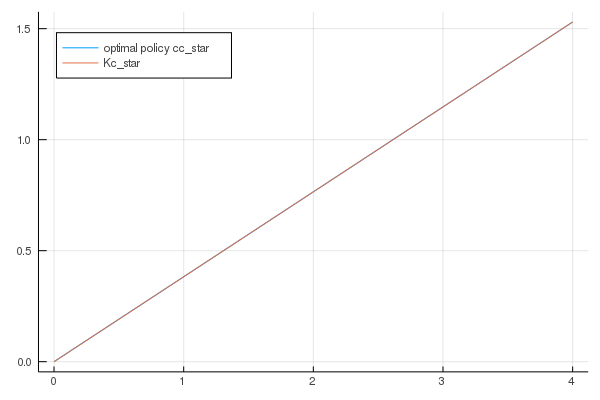

In [10]:
c_star = (1 - m.α * m.β) * m.grid # verdadeira política (c_star)
verify_true_policy(m, shocks, c_star)

Não podemos realmente distinguir claramente as duas parcelas, por isso estamos com boa aparência, pelo menos para este teste.

Em seguida, vamos tentar iterar a partir de uma condição inicial arbitrária e ver se convergimos para $ c^* $.

A condição inicial que usaremos é a que detém toda a parcela: $ c(y) = y $

In [11]:
function check_convergence(m, shocks, c_star, g_init; n_iter = 15)
    @unpack grid, β, ∂u∂c, f, f′ = m
    g = g_init;
    plot(m.grid, g, lw = 2, alpha = 0.6, label = "intial condition c(y) = y")
    for i in 1:n_iter
        new_g = K(g, grid, β, ∂u∂c, f, f′, shocks)
        g = new_g
        plot!(grid, g, lw = 2, alpha = 0.6, label = "")
    end
    plot!(grid, c_star, color = :black, lw = 2, alpha = 0.8,
          label = "true policy function c_star")
    plot!(legend = :topleft)
end

check_convergence (generic function with 1 method)

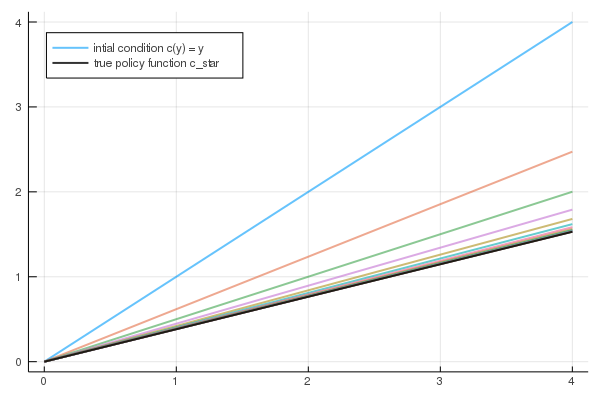

In [12]:
check_convergence(m, shocks, c_star, m.grid, n_iter = 15)

Vemos que a política convergiu muito bem, em apenas algumas etapas.

Agora vamos comparar a precisão da iteração usando os operadores Coleman e Bellman.

Nós vamos gerar:

1. $ K^n c $ onde $ c(y) = y $  
1. $ (M \circ T^n \circ M^{-1}) c $ onde $ c(y) = y $  


Em cada caso, compararemos a política resultante com $ c^* $.

A teoria da dinâmica equivalente diz que obteremos a mesma função de política e, portanto, os mesmos erros.

Mas, de fato, esperamos que o primeiro método seja mais preciso pelas razões discutidas acima.

In [13]:
function iterate_updating(func, arg_init; sim_length = 20)
    arg = arg_init;
    for i in 1:sim_length
        new_arg = func(arg)
        arg = new_arg
    end
    return arg
end

function compare_error(m, shocks, g_init, w_init; sim_length = 20)
    @unpack grid, β, u, ∂u∂c, f, f′ = m
    g, w = g_init, w_init

    # duas funções para simplificação
    bellman_single_arg(w) = T(w, grid, β, u, f, shocks)
    coleman_single_arg(g) = K(g, grid, β, ∂u∂c, f, f′, shocks)

    g = iterate_updating(coleman_single_arg, grid, sim_length = 20)
    w = iterate_updating(bellman_single_arg, u.(grid), sim_length = 20)
    new_w, vf_g = T(w, grid, β, u, f, shocks, compute_policy = true)

    pf_error = c_star - g
    vf_error = c_star - vf_g

    plot(grid, zero(grid), color = :black, lw = 1)
    plot!(grid, pf_error, lw = 2, alpha = 0.6, label = "policy iteration error")
    plot!(grid, vf_error, lw = 2, alpha = 0.6, label = "value iteration error")
    plot!(legend = :bottomleft)
end

compare_error (generic function with 1 method)

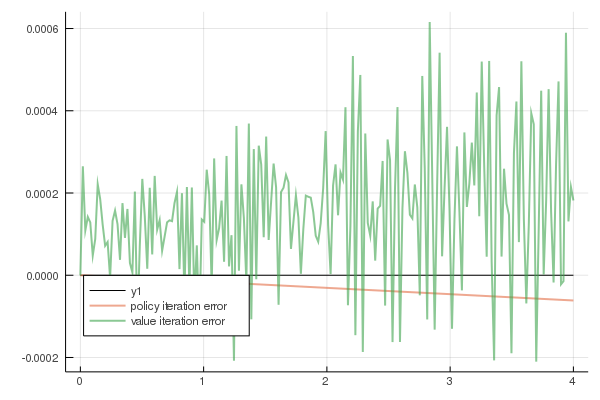

In [14]:
compare_error(m, shocks, m.grid, m.u.(m.grid), sim_length=20)

Como você pode ver, a iteração de tempo é muito mais precisa para um determinado número de iterações.

## Exercícios

### Exercício 1

Mostre que [(9)](#equation-cpi-ed-tk) é válido. Em particular:

- Seja $ v $ estritamente côncavo e continuamente diferenciável em  $ (0, \infty) $  
- Fixe $ y \in (0, \infty) $ e mostre que $ MTv(y) = KMv(y) $  

### Exercício 2

Mostre que $ M $ é uma bijeção de $ \mathscr V $ para $ \mathscr P $.

### Exercício 3

Considere o mesmo modelo acima, mas com a função de utilidade CRRA;


$$
u(c) = \frac{c^{1 - \gamma} - 1}{1 - \gamma}
$$

Itere 20  vezes com iteração de Bellman e iteração de tempo da equação de Euler:

- comece as iterações de tempo de $ c(y) = y $  
- comece a iteração de valor de $ v(y) = u(y) $  
- defina $ \gamma = 1.5 $  


Compare as políticas resultantes e verifique se elas estão próximas.

### Exercício 4

Faça o mesmo exercício, mas agora, em vez de plotar resultados, compare as duas abordagens com 20 iterações.

## Soluções

### Soluções para o Exercício 1

Seja $ T, K, M, v $ e $ y $ conforme afirmado no exercício.

Usando o teorema do envelope, podemos mostrar que $ (Tv)'(y) = u'(c(y)) $
onde $ c(y) $ resolve:


<a id='equation-cpi-foo'></a>
$$
u'(c(y))
= \beta \int v' (f(y - c(y)) z ) f'(y - c(y)) z \phi(dz) \tag{10}
$$

Portanto $ MTv(y) = (u')^{-1} (u'(c(y))) = c(y) $.

Por outro lado, $ KMv(y) $ é o $ c(y) $ que resolve:

$$
\begin{aligned}
    u'(c(y))
    & = \beta \int (u' \circ (Mv)) (f(y - c(y)) z ) f'(y - c(y)) z \phi(dz)
    \\
    & = \beta \int (u' \circ ((u')^{-1} \circ v'))
        (f(y - c(y)) z ) f'(y - c(y)) z \phi(dz)
    \\
    & = \beta \int v'(f(y - c(y)) z ) f'(y - c(y)) z \phi(dz)
\end{aligned}
$$

Vemos que $ c(y) $ é o mesmo em cada caso.

### Soluções para o Exercício 2

Precisamos mostrar que $ M $ é uma bijeção de $ \mathscr V $ para $ \mathscr P $.

Para ver isso, primeiro observe que, em vista de nossas suposições acima, $ u' $ é uma bijeção contínua estritamente decrescente de $ (0,\infty) $ sí mesmo.

[Segue](https://math.stackexchange.com/questions/672174/continuity-of-an-inverse-function) que $ h $ tem as mesmas propriedades.

Além disso, para pontos fixos $ v \in \mathscr V $, a derivada $ v' $ é uma função contínua e estritamente decrescente.

Portanto, para $ v \in \mathscr V $ fixo, o mapa $ M v = h \circ v' $
é estritamente crescente e contínuo, assumindo valores em $ (0, \infty) $.

Além disso, interioridade é válida porque $ v' $ domina estritamente $ u' $, implicando que:

$$
(M v)(y) = h(v'(y)) < h(u'(y)) = y
$$

Em particular, $ \sigma(y) := (Mv)(y) $ é um elemento de $ \mathscr
P $.

Para ver que cada $ \sigma \in \mathscr P $ tem uma pré-imagem $ v \in \mathscr V $ com $ Mv = \sigma $, estabelecido qualquer $ \sigma \in \mathscr P $.

Seja $ v(y) := \int_0^y u'(\sigma(x)) dx $ com $ v(0) = 0 $.

Com um pequeno esforço, você será capaz de mostrar que $ v \in \mathscr V $ e $ Mv = \sigma $.

Também é verdade que $ M $ é individual em $ \mathscr V $.

Para ver isso, suponha que $ v $ e $ w $ são elementos de $ \mathscr V $
satisfazendo $ Mv = Mw $.

Então $ v(0) = w(0) = 0 $ e $ v' = w' $ em $ (0, \infty) $.

O teorema fundamental do cálculo implica que $ v = w $ nos $ \mathbb R_+ $.

### Solução para o Exercício 3

Aqui está o código, que será executado se você executou todo o código acima:

In [15]:
# Instância do modelo com aversão ao risco = 1,5 
# outras são iguais à instância anterior 
m_ex = Model(γ = 1.5);

In [16]:
function exercise2(m, shocks, g_init = m.grid, w_init = m.u.(m.grid); sim_length = 20)

    @unpack grid, β, u, ∂u∂c, f, f′ = m
    # política e valor iniciais
    g, w = g_init, w_init
    # iteração
    bellman_single_arg(w) = T(w, grid, β, u, f, shocks)
    coleman_single_arg(g) = K(g, grid, β, ∂u∂c, f, f′, shocks)

    g = iterate_updating(coleman_single_arg, grid, sim_length = 20)
    w = iterate_updating(bellman_single_arg, u.(m.grid), sim_length = 20)
    new_w, vf_g = T(w, grid, β, u, f, shocks, compute_policy = true)

    plot(grid, g, lw = 2, alpha = 0.6, label = "policy iteration")
    plot!(grid, vf_g, lw = 2, alpha = 0.6, label = "value iteration")
    return plot!(legend = :topleft)
end

exercise2 (generic function with 3 methods)

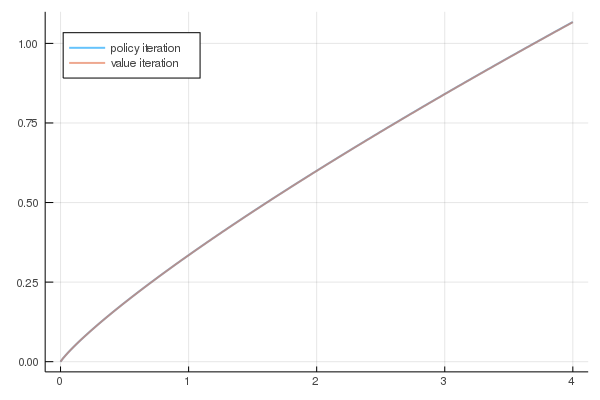

In [17]:
exercise2(m_ex, shocks, m.grid, m.u.(m.grid), sim_length=20)

As políticas de fato estão próximas.

### Solução para o Exercício 4

Aqui está o código.

Parte do princípio que você acabou de executar o código do exercício anterior.

In [18]:
function bellman(m, shocks)
    @unpack grid, β, u, ∂u∂c, f, f′ = m
    bellman_single_arg(w) = T(w, grid, β, u, f, shocks)
    iterate_updating(bellman_single_arg, u.(grid), sim_length = 20)
end
function coleman(m, shocks)
    @unpack grid, β, ∂u∂c, f, f′ = m
    coleman_single_arg(g) = K(g, grid, β, ∂u∂c, f, f′, shocks)
    iterate_updating(coleman_single_arg, grid, sim_length = 20)
end

coleman (generic function with 1 method)

In [19]:
@benchmark bellman(m_ex, shocks)

BenchmarkTools.Trial: 
  memory estimate:  155.94 MiB
  allocs estimate:  90741
  --------------
  minimum time:     653.071 ms (3.50% GC)
  median time:      668.087 ms (3.45% GC)
  mean time:        668.634 ms (3.51% GC)
  maximum time:     681.606 ms (3.39% GC)
  --------------
  samples:          8
  evals/sample:     1

In [20]:
@benchmark bellman(m_ex, shocks)

BenchmarkTools.Trial: 
  memory estimate:  155.94 MiB
  allocs estimate:  90741
  --------------
  minimum time:     651.615 ms (3.53% GC)
  median time:      665.492 ms (3.49% GC)
  mean time:        664.885 ms (3.55% GC)
  maximum time:     676.551 ms (3.45% GC)
  --------------
  samples:          8
  evals/sample:     1